In [1]:
# Writer : JESOON KANG, Dept. of Computer Science & Engineering in Chung-Ang University
# Last-Modified Date : April 17,2020

In [2]:
import matplotlib.pyplot as plt
import math
import numpy as np
import random
import torch
from torch.utils.data import Dataset, DataLoader
import torchvision.transforms as transforms
import torchvision
import os
from random import *

In [3]:
### Setting up Device
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
# Below codes activates when want to use cpu
#device = torch.device('cpu')
print('Using device:', device)
print()

#Additional Info when using cuda
if device.type == 'cuda':
    print(torch.cuda.get_device_name(0))
    print('Memory Usage:')
    print('Allocated:', round(torch.cuda.memory_allocated(0)/1024**3,1), 'GB')
    print('Cached:   ', round(torch.cuda.memory_cached(0)/1024**3,1), 'GB')

Using device: cuda

GeForce RTX 2060 SUPER
Memory Usage:
Allocated: 0.0 GB
Cached:    0.0 GB


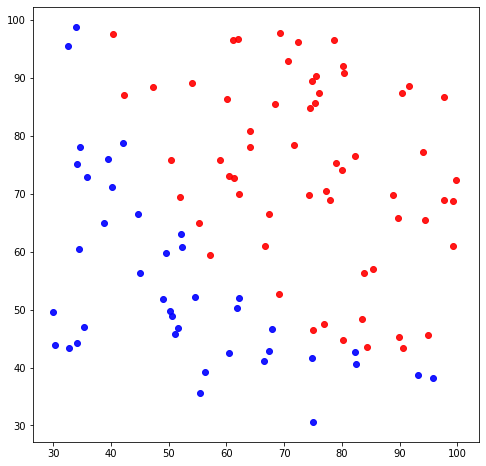

In [4]:
# Plot the training data
import numpy as np
import matplotlib.pyplot as plt

data    = np.genfromtxt("data.txt", delimiter=',')

x       = data[:, 0]
y       = data[:, 1]
label   = data[:, 2]

x_label0    = x[label == 0]
x_label1    = x[label == 1]

y_label0    = y[label == 0]
y_label1    = y[label == 1]

plt.figure(figsize=(8, 8))
plt.scatter(x_label0, y_label0, alpha=0.9, c='b')
plt.scatter(x_label1, y_label1, alpha=0.9, c='r')
plt.show()

In [5]:
x = torch.FloatTensor(x).to('cuda')
y = torch.FloatTensor(y).to('cuda')
label = torch.FloatTensor(label).to('cuda')

x_label0 = torch.FloatTensor(x_label0).to('cuda')
x_label1 = torch.FloatTensor(x_label1).to('cuda')

y_label0 = torch.FloatTensor(y_label0).to('cuda')
y_label1 = torch.FloatTensor(y_label1).to('cuda')


In [6]:
# Initialize thetas 
th0 = torch.FloatTensor([-16.0]).to('cuda')
th1 = torch.FloatTensor([1.0]).to('cuda')
th2 = torch.FloatTensor([1.0]).to('cuda')

def sigmoid(z) :
    return torch.reciprocal(torch.sum(1 + torch.exp(z)))

# Setting Step-size. (Learning-rate)
lr = 0.001

# Setting converge value
loss_conv = 1e-8 # loss converge standard

# Lists for logging
loss_log = []
th0_log = []
th1_log = []
th2_log = []
epoch_log = []
conv_count = 0 # Variable To count converge
epoch = 0 # Inital epoch value

test_loss_log = []


while (True) :
    epoch +=1
    epoch_log.append(epoch)
    
    ## Training 
    # Get Train yh
    z = th0 + th1*x + th2*y
    activ = 1 / (1+torch.exp(-z))
    
    m = len(activ)
    
    # Get Loss 
    loss = (1/m) * torch.sum( \
                             -label*torch.log(activ) - (1-label)*torch.log(1 - activ) )
    
    
    # Logging
    loss_log.append(loss)
    th0_log.append(th0)
    th1_log.append(th1)
    th2_log.append(th2)
    
    
    # Updating Parameters - Gradient Descent
    th0 = th0 - lr * (1/m) * torch.sum(activ - label)
    th1 = th1 - lr * (1/m) * torch.sum((activ-label)*x)
    th2 = th2 - lr * (1/m) * torch.sum((activ-label)*y)
    
    
    ## Does Train Loss Converged?
    if len(loss_log) > 2 :
        if abs(loss_log[-1] - loss_log[-2]) < loss_conv :
            conv_count += 1
        else :
            conv_count = 0
    
    # For monitor
    
    if epoch %1000 == 0 :
        acc = 0
        for i in range(0,len(activ)) :
            if activ[i] >= 0.5 :
                if label[i] == 1 :
                    acc += 1
            else :
                if label[i] == 0 :
                    acc += 1
        acc = acc / len(activ)
        print("epoch {}, th0 {:.5f}, th1 {:.5f}, th2 {:5f}, loss {:.10f}, acc {:.3f}".\
              format(epoch,th0.item(),th1.item(),th2.item(),loss_log[-1],acc) )
     
    ## Escape if Training loss is converged
    if conv_count > 3 :
        print("Loss is converged")
        print("epoch {}, th0 {:.5f}, th1 {:.5f}, th2 {:5f}, loss {:.10f}, acc {:.3f}".\
              format(epoch,th0.item(),th1.item(),th2.item(),loss_log[-1],acc))                 
        break



epoch 1000, th0 -16.02173, th1 0.13325, th2 0.127533, loss 0.2214662880, acc 0.890
epoch 2000, th0 -16.02746, th1 0.13330, th2 0.127580, loss 0.2214388251, acc 0.890
epoch 3000, th0 -16.03318, th1 0.13334, th2 0.127626, loss 0.2214113921, acc 0.890
epoch 4000, th0 -16.03890, th1 0.13339, th2 0.127672, loss 0.2213840038, acc 0.890
epoch 5000, th0 -16.04462, th1 0.13343, th2 0.127718, loss 0.2213566154, acc 0.890
epoch 6000, th0 -16.05034, th1 0.13348, th2 0.127764, loss 0.2213293165, acc 0.890
epoch 7000, th0 -16.05607, th1 0.13352, th2 0.127811, loss 0.2213019878, acc 0.890
epoch 8000, th0 -16.06012, th1 0.13356, th2 0.127843, loss 0.2212826908, acc 0.890
Loss is converged
epoch 8126, th0 -16.06060, th1 0.13356, th2 0.127847, loss 0.2212804407, acc 0.890


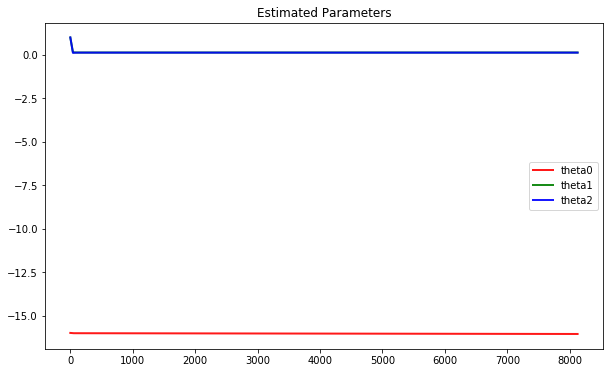

th0: -16.060592651367188 
th1: 0.1335608959197998 
th2: 0.1278471052646637


In [7]:
# 2. Plot the estimated parameters using the training dataset

plt.figure(figsize=(10, 6))
plot0, = plt.plot(epoch_log,th0_log, color='red',linewidth= 2,alpha=0.9)
plot1, = plt.plot(epoch_log,th1_log, color='green',linewidth= 2,alpha=0.9)
plot2, = plt.plot(epoch_log,th2_log, color='blue',linewidth= 2,alpha=0.9)

plt.title("Estimated Parameters") 
plt.legend([plot0,plot1,plot2],["theta0","theta1",'theta2'])

plt.show()


print("th0:",th0_log[-1].item(),"\nth1:",th1_log[-1].item(),"\nth2:",th2_log[-1].item())

Converged Training loss : 0.22128


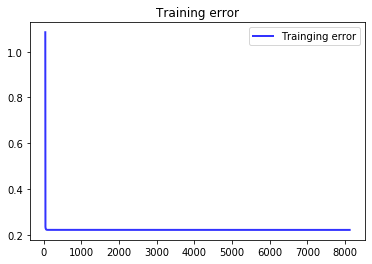

In [8]:
# 3. Plot the training error using the training dataset
plt.title("Training error")
plot, = plt.plot(epoch_log,loss_log, color='blue',linewidth=2,alpha=0.8)
plt.legend([plot],["Trainging error"])
print("Converged Training loss : {:.5f}".format(loss_log[-1].item()))

In [136]:
import collections

Point = collections.namedtuple('Point',['x','y'])
#datas = [Point(x,y) for x,y in zip(x_data,y_data)]

th0 = th0_log[-1]
th1 = th1_log[-1]
th2 = th2_log[-1]

# Get -30:30:0.1 tensor
xs = torch.linspace(start=30,end=100,steps=141,device='cuda')
ys = torch.linspace(start=30,end=100,steps=141,device='cuda')
print(xs.shape)
datas = []
for x in xs.cpu().numpy() :
    for y in ys.cpu().numpy():
        z = th0 + th1*x + th2*y
        activ = 1 / (1 + torch.exp(z))
        if activ >= 0.5 :
            datas.append([x,y,(activ.item(),0,1-activ.item()) ])
        else :
            datas.append([x,y,(activ.item(),0,1-activ.item()) ])

print("end")

torch.Size([141])
end


0.9997304081916809


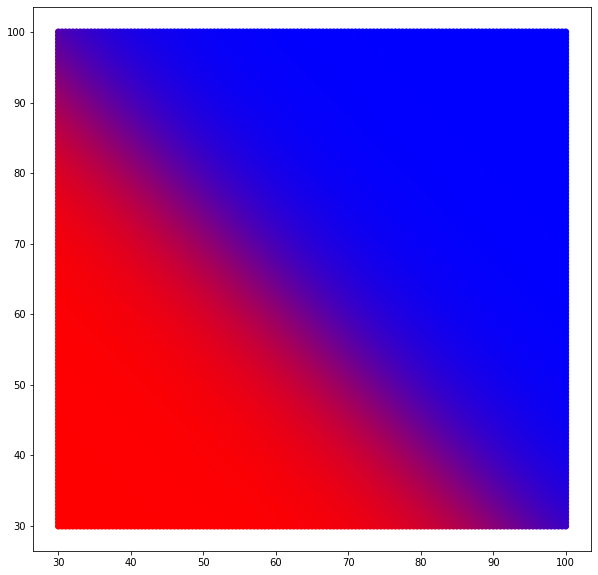

In [137]:
datas = np.array(datas)
xs = datas[:,0]
ys = datas[:,1]
colors = datas[:,2]
print(alphas[0])
fig, ax = plt.subplots(figsize=(10,10))
ax.scatter(xs,ys,color=colors, )

plt.show()